<a href="https://colab.research.google.com/github/czyz-patryk/dataScienceBootcampExercises/blob/main/Copy_of_121_130_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'1.21.6'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [2]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [3]:
google = fetch_financial_data('GOOGL')
google

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-08,102.0500,103.1400,98.0350,99.3700,94743515
2023-02-07,103.2200,108.1800,103.1200,107.6400,49010230
2023-02-06,102.4000,104.3600,101.8800,102.9000,31999562
2023-02-03,102.9300,107.8100,102.5800,104.7800,65309261
2023-02-02,105.8000,107.8500,105.6100,107.7400,69883762
...,...,...,...,...,...
2018-02-16,54.6690,55.4155,54.5775,54.7750,39863040
2018-02-15,54.1725,54.7050,53.3615,54.5680,37180260
2018-02-14,52.7160,53.7735,52.4900,53.6350,41284160


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [4]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2023-02-08 to 2018-02-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [7]:

google.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1257.0,8.654460e+01,3.051274e+01,4.921600e+01,5.921250e+01,7.541050e+01,1.126400e+02,1.512500e+02
High,1257.0,8.752431e+01,3.080694e+01,5.060600e+01,5.982900e+01,7.606600e+01,1.140140e+02,1.515470e+02
Low,1257.0,8.557674e+01,3.015610e+01,4.888300e+01,5.863150e+01,7.475850e+01,1.114600e+02,1.488990e+02
Close,1257.0,8.657063e+01,3.047665e+01,4.923350e+01,5.920350e+01,7.552250e+01,1.127210e+02,1.498380e+02
Volume,1257.0,3.520219e+07,1.574950e+07,9.312760e+06,2.515340e+07,3.143660e+07,4.025206e+07,1.331771e+08


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__ 
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [8]:
pd.set_option("display.precision", 2)

__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [9]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,86.54,87.52,85.58,86.57,35202187.34
std,30.51,30.81,30.16,30.48,15749502.29
min,49.22,50.61,48.88,49.23,9312760.00
25%,59.21,59.83,58.63,59.20,25153400.00
50%,75.41,76.07,74.76,75.52,31436600.00
75%,112.64,114.01,111.46,112.72,40252060.00
max,151.25,151.55,148.90,149.84,133177100.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

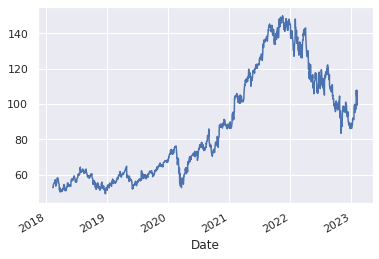

In [12]:
_ = google['Close'].plot()

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [13]:
google = google.reset_index()
google

,Date,Open,High,Low,Close,Volume
0,2023-02-08,102.05,103.14,98.03,99.37,94743515
1,2023-02-07,103.22,108.18,103.12,107.64,49010230
2,2023-02-06,102.40,104.36,101.88,102.90,31999562
3,2023-02-03,102.93,107.81,102.58,104.78,65309261
4,2023-02-02,105.80,107.85,105.61,107.74,69883762
...,...,...,...,...,...,...
1252,2018-02-16,54.67,55.42,54.58,54.77,39863040
1253,2018-02-15,54.17,54.70,53.36,54.57,37180260
1254,2018-02-14,52.72,53.77,52.49,53.63,41284160
1255,2018-02-13,52.50,53.06,52.35,52.71,31520540


Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [28]:
google['Month'] = google['Date'].dt.strftime('%m')
google['Year'] = google['Date'].dt.strftime('%Y')
google

,Date,Open,High,Low,Close,Volume,Month,Year
0,2023-02-08,102.05,103.14,98.03,99.37,94743515,02,2023
1,2023-02-07,103.22,108.18,103.12,107.64,49010230,02,2023
2,2023-02-06,102.40,104.36,101.88,102.90,31999562,02,2023
3,2023-02-03,102.93,107.81,102.58,104.78,65309261,02,2023
4,2023-02-02,105.80,107.85,105.61,107.74,69883762,02,2023
...,...,...,...,...,...,...,...,...
1252,2018-02-16,54.67,55.42,54.58,54.77,39863040,02,2018
1253,2018-02-15,54.17,54.70,53.36,54.57,37180260,02,2018
1254,2018-02-14,52.72,53.77,52.49,53.63,41284160,02,2018
1255,2018-02-13,52.50,53.06,52.35,52.71,31520540,02,2018


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [40]:
close_mean = google.groupby('Year')['Close'].mean()
close_mean

Year
2018    56.09
2019    59.56
2020    73.95
2021   124.22
2022   114.76
2023    95.53
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

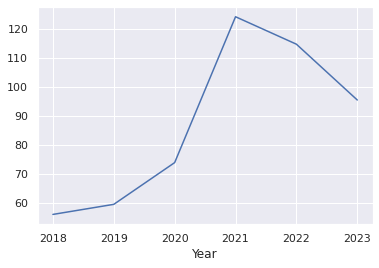

In [42]:
_ = close_mean.plot()

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [45]:
month_mean = google.groupby('Month')['Close'].mean()
month_mean

Month
01   88.45
02   88.19
03   83.23
04   82.93
05   81.15
06   83.85
07   86.31
08   90.70
09   88.91
10   85.65
11   89.51
12   90.29
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

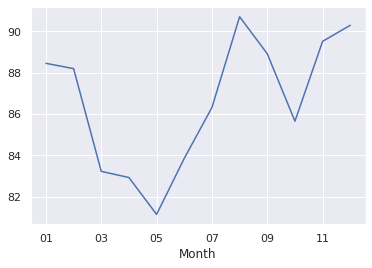

In [46]:
month_mean.plot()

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [49]:
google.groupby(['Year', 'Month']).mean()

Open   High    Low  Close      Volume
Year Month                                        
2018 02     54.90  55.53  54.42  54.96 38057273.33
     03     54.89  55.55  53.95  54.69 49634858.10
     04     52.08  52.72  51.41  52.00 46856317.14
     05     53.53  54.11  53.18  53.74 33669584.55
     06     57.42  57.94  56.95  57.47 38271052.38
...           ...    ...    ...    ...         ...
2022 10     98.55 100.33  97.41  98.88 32459671.86
     11     93.94  95.37  92.46  93.91 34120840.43
     12     92.67  93.71  91.37  92.32 28700812.43
2023 01     92.49  93.96  91.49  93.04 33644877.10
     02    102.52 105.42 101.47 103.81 57746239.00

[61 rows x 5 columns]

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [52]:
google['Close'].idxmax()

306

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [61]:
ind_306 = pd.DataFrame(google.iloc[306])
ind_306.loc['Date']

306    2021-11-18 00:00:00
Name: Date, dtype: object

### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [65]:
google_date = google['Date']
google_date

0      2023-02-08
1      2023-02-07
2      2023-02-06
3      2023-02-03
4      2023-02-02
          ...    
1252   2018-02-16
1253   2018-02-15
1254   2018-02-14
1255   2018-02-13
1256   2018-02-12
Name: Date, Length: 1257, dtype: datetime64[ns]

### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [78]:
google.set_index('Date')
google

KeyError: ignored

### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [79]:
google = google.drop(['Year'], 1)
google = google.drop(['Month'], 1)
google

<ipython-input-79-4959cd59ddaa>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  google = google.drop(['Year'], 1)


KeyError: ignored

### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [81]:
google.columns = ['Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen']
google

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Date,,,,,
2023-02-08,102.05,103.14,98.03,99.37,94743515
2023-02-07,103.22,108.18,103.12,107.64,49010230
2023-02-06,102.40,104.36,101.88,102.90,31999562
2023-02-03,102.93,107.81,102.58,104.78,65309261
2023-02-02,105.80,107.85,105.61,107.74,69883762
...,...,...,...,...,...
2018-02-16,54.67,55.42,54.58,54.77,39863040
2018-02-15,54.17,54.70,53.36,54.57,37180260
2018-02-14,52.72,53.77,52.49,53.63,41284160
